<a href="https://colab.research.google.com/github/Shivani-781/Ganga-Water-Quality-Assessment/blob/main/11_Dempster_Shafer_Theory_(Part_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DST - Hypothesis Testing

Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import mixture
%matplotlib inline

In [ ]:
df = pd.read_csv('Ganga_Classification_data.csv')
df

,Date,Frame No,BAT,COND,DO,ORP,PH,WT,Cluster
0,12-01-2019 12:57,0,91.0,0.044698,14.832754,0.084822,8.879727,22.650238,1
1,12-01-2019 12:58,1,92.0,0.044651,14.170345,0.086292,8.866815,22.567017,1
2,12-01-2019 14:54,0,90.0,46.195190,13.501176,0.142900,12.359906,18.400787,1
3,12-01-2019 14:55,1,91.0,52.609680,20.752865,0.146236,12.825684,18.013641,1
4,12-01-2019 14:56,2,91.0,52.399826,12.409351,0.146724,12.998978,18.184570,1
...,...,...,...,...,...,...,...,...,...
46978,05-03-2020 17:40,193,87.0,721.867250,10.008608,0.116298,9.377568,27.130707,0
46979,05-03-2020 17:41,194,85.0,722.117000,10.008608,0.116288,9.374988,27.142334,0
46980,05-03-2020 17:42,195,80.0,722.028700,10.008608,0.116238,9.375849,27.139954,0
46981,05-03-2020 17:43,196,81.0,721.960700,10.008608,0.116218,9.380211,27.135010,0


Separating Clusters

In [ ]:
Cluster_1 = df[df['Cluster'] == 0]
Cluster_2 = df[df['Cluster'] == 1]
Cluster_3 = df[df['Cluster'] == 2]
Cluster_4 = df[df['Cluster'] == 3]

In [ ]:
print(Cluster_1.shape)
print(Cluster_2.shape)
print(Cluster_3.shape)
print(Cluster_4.shape)

(4783, 9)
(9307, 9)
(13085, 9)
(19808, 9)


The **Dempster Shafer Theory**, also known as the theory of **belief functions**, was designed to mathematically model and validate the **uncertainty** involved in statistical inferences. It combines a set of representations and model data when there is a lack of information.

DST is mostly known to represent uncertainties or imprecision in a hypothesis. The hypotheses characterize all the possible states of the system. These hypotheses are assigned a **probability mass assignment (PMA)** which when combined leads to a decision. 

**PMA** for parameter y to be in class x is given as below:

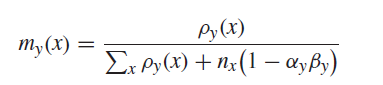

Let's calculate values of probability density function, alpha and beta to find PMA. Then, PMA is used to find **Dempster's combinations** as: 

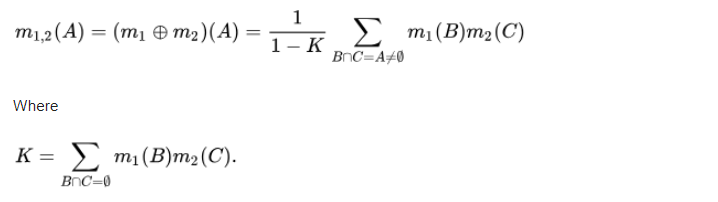

Cluster 1

In [ ]:
#cond
cond = Cluster_1['COND']
#cond = cond.reset_index(drop=True)
cond_pdf_1 = np.zeros([4783,1])
cond=np.asarray(cond)
cond=np.reshape(cond,(4783,1))
gmm = mixture.GaussianMixture(n_components=1, covariance_type='full',max_iter=10000,tol=0.00001)
gmm.fit(cond)
mu = gmm.means_
variance = gmm.covariances_
sigma = np.sqrt(variance)
for i in range(0, 4783):
    x = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-np.power((cond[i] - mu)/sigma, 2)/2)
    cond_pdf_1[i] = x
cond_pdf_1

array([[0.00551836],
       [0.00551831],
       [0.0053593 ],
       ...,
       [0.00172707],
       [0.00172955],
       [0.00172395]])

In [ ]:
#do
do = Cluster_1['DO']
#do = do.reset_index(drop=True)
do_pdf_1 = np.zeros([4783,1])
do=np.asarray(do)
do=np.reshape(do,(4783,1))
gmm = mixture.GaussianMixture(n_components=1, covariance_type='full',max_iter=10000,tol=0.00001)
gmm.fit(do)
mu = gmm.means_
variance = gmm.covariances_
sigma = np.sqrt(variance)
for i in range(0, 4783):
    x = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-np.power((do[i] - mu)/sigma, 2)/2)
    do_pdf_1[i] = x
do_pdf_1

array([[4.52641629e-23],
       [5.42506532e-23],
       [4.75948341e-02],
       ...,
       [3.06761969e-02],
       [3.06761969e-02],
       [3.06761969e-02]])

In [ ]:
#orp
orp = Cluster_1['ORP']
#orp = orp.reset_index(drop=True)
orp_pdf_1 = np.zeros([4783,1])
orp=np.asarray(orp)
orp=np.reshape(orp,(4783,1))
gmm = mixture.GaussianMixture(n_components=1, covariance_type='full',max_iter=10000,tol=0.00001)
gmm.fit(orp)
mu = gmm.means_
variance = gmm.covariances_
sigma = np.sqrt(variance)
for i in range(0, 4783):
    x = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-np.power((orp[i] - mu)/sigma, 2)/2)
    orp_pdf_1[i] = x
orp_pdf_1

array([[5.11640491e-03],
       [5.04580074e-03],
       [2.22433904e-06],
       ...,
       [6.83244412e+00],
       [6.84774845e+00],
       [6.87477080e+00]])

In [ ]:
#ph
ph = Cluster_1['PH']
#ph = ph.reset_index(drop=True)
ph_pdf_1 = np.zeros([4783,1])
ph=np.asarray(ph)
ph=np.reshape(ph,(4783,1))
gmm = mixture.GaussianMixture(n_components=1, covariance_type='full',max_iter=10000,tol=0.00001)
gmm.fit(ph)
mu = gmm.means_
variance = gmm.covariances_
sigma = np.sqrt(variance)
for i in range(0, 4783):
    x = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-np.power((ph[i] - mu)/sigma, 2)/2)
    ph_pdf_1[i] = x
ph_pdf_1

array([[9.40830865e-01],
       [6.86197391e-01],
       [1.13812877e-07],
       ...,
       [2.72088892e-01],
       [2.78327041e-01],
       [2.64774571e-01]])

In [ ]:
#WT
wt = Cluster_1['WT']
#wt = wt.reset_index(drop=True)
wt_pdf_1 = np.zeros([4783,1])
wt=np.asarray(wt)
wt=np.reshape(wt,(4783,1))
gmm = mixture.GaussianMixture(n_components=1, covariance_type='full',max_iter=10000,tol=0.00001)
gmm.fit(wt)
mu = gmm.means_
variance = gmm.covariances_
sigma = np.sqrt(variance)
for i in range(0, 4783):
    x = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-np.power((wt[i] - mu)/sigma, 2)/2)
    wt_pdf_1[i] = x
wt_pdf_1

array([[0.04965967],
       [0.05155636],
       [0.07324969],
       ...,
       [0.07333524],
       [0.07347818],
       [0.07358056]])

Cluster 2

In [ ]:
#cond
cond = Cluster_2['COND']
#cond = cond.reset_index(drop=True)
cond_pdf_2 = np.zeros([9307,1])
cond=np.asarray(cond)
cond=np.reshape(cond,(9307,1))
gmm = mixture.GaussianMixture(n_components=1, covariance_type='full',max_iter=10000,tol=0.00001)
gmm.fit(cond)
mu = gmm.means_
variance = gmm.covariances_
sigma = np.sqrt(variance)
for i in range(0, 9307):
    x = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-np.power((cond[i] - mu)/sigma, 2)/2)
    cond_pdf_2[i] = x
cond_pdf_2

array([[0.01048103],
       [0.01048101],
       [0.01037149],
       ...,
       [0.01085206],
       [0.0109708 ],
       [0.01116765]])

In [ ]:
#do
do = Cluster_2['DO']
#do = do.reset_index(drop=True)
do_pdf_2 = np.zeros([9307,1])
do=np.asarray(do)
do=np.reshape(do,(9307,1))
gmm = mixture.GaussianMixture(n_components=1, covariance_type='full',max_iter=10000,tol=0.00001)
gmm.fit(do)
mu = gmm.means_
variance = gmm.covariances_
sigma = np.sqrt(variance)
for i in range(0, 9307):
    x = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-np.power((do[i] - mu)/sigma, 2)/2)
    do_pdf_2[i] = x
do_pdf_2

array([[6.25193365e-10],
       [4.60950839e-10],
       [3.37907466e-10],
       ...,
       [7.82927876e-10],
       [7.72474458e-10],
       [4.44945218e-09]])

In [ ]:
#orp
orp = Cluster_2['ORP']
#orp = orp.reset_index(drop=True)
orp_pdf_2 = np.zeros([9307,1])
orp=np.asarray(orp)
orp=np.reshape(orp,(9307,1))
gmm = mixture.GaussianMixture(n_components=1, covariance_type='full',max_iter=10000,tol=0.00001)
gmm.fit(orp)
mu = gmm.means_
variance = gmm.covariances_
for i in range(0, 9307):
    x = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-np.power((orp[i] - mu)/sigma, 2)/2)
    orp_pdf_2[i] = x
orp_pdf_2

array([[0.03070974],
       [0.03070975],
       [0.03070967],
       ...,
       [0.03070978],
       [0.03070977],
       [0.03070979]])

In [ ]:
#ph
ph = Cluster_2['PH']
#ph = ph.reset_index(drop=True)
ph_pdf_2 = np.zeros([9307,1])
ph=np.asarray(ph)
ph=np.reshape(ph,(9307,1))
gmm = mixture.GaussianMixture(n_components=1, covariance_type='full',max_iter=10000,tol=0.00001)
gmm.fit(ph)
mu = gmm.means_
variance = gmm.covariances_
for i in range(0, 9307):
    x = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-np.power((ph[i] - mu)/sigma, 2)/2)
    ph_pdf_2[i] = x
ph_pdf_2

array([[0.02988857],
       [0.02988164],
       [0.03069091],
       ...,
       [0.02956558],
       [0.02955332],
       [0.02924829]])

In [ ]:
#WT
wt = Cluster_2['WT']
#wt = wt.reset_index(drop=True)
wt_pdf_2 = np.zeros([9307,1])
wt=np.asarray(wt)
wt=np.reshape(wt,(9307,1))
gmm = mixture.GaussianMixture(n_components=1, covariance_type='full',max_iter=10000,tol=0.00001)
gmm.fit(wt)
mu = gmm.means_
variance = gmm.covariances_
for i in range(0, 9307):
    x = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-np.power((wt[i] - mu)/sigma, 2)/2)
    wt_pdf_2[i] = x
wt_pdf_2

array([[0.02904876],
       [0.02898617],
       [0.02468971],
       ...,
       [0.03053962],
       [0.0307081 ],
       [0.02136995]])

Cluster 3

In [ ]:
#cond
cond = Cluster_3['COND']
#cond = cond.reset_index(drop=True)
cond_pdf_3 = np.zeros([13085,1])
cond=np.asarray(cond)
cond=np.reshape(cond,(13085,1))
gmm = mixture.GaussianMixture(n_components=1, covariance_type='full',max_iter=10000,tol=0.00001)
gmm.fit(cond)
mu = gmm.means_
variance = gmm.covariances_
for i in range(0, 13085):
    x = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-np.power((cond[i] - mu)/sigma, 2)/2)
    cond_pdf_3[i] = x
cond_pdf_3

array([[5.49859553e-07],
       [4.29867774e-07],
       [3.37429759e-07],
       ...,
       [2.24243310e-02],
       [2.25883319e-02],
       [2.25744284e-02]])

In [ ]:
#do
do = Cluster_3['DO']
#do = do.reset_index(drop=True)
do_pdf_3 = np.zeros([13085,1])
do=np.asarray(do)
do=np.reshape(do,(13085,1))
gmm = mixture.GaussianMixture(n_components=1, covariance_type='full',max_iter=10000,tol=0.00001)
gmm.fit(do)
mu = gmm.means_
variance = gmm.covariances_
for i in range(0, 13085):
    x = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-np.power((do[i] - mu)/sigma, 2)/2)
    do_pdf_3[i] = x
do_pdf_3

array([[0.00048199],
       [0.00035142],
       [0.03031685],
       ...,
       [0.00247279],
       [0.00247279],
       [0.00247279]])

In [ ]:
#orp
orp = Cluster_3['ORP']
#orp = orp.reset_index(drop=True)
orp_pdf_3 = np.zeros([13085,1])
orp=np.asarray(orp)
orp=np.reshape(orp,(13085,1))
gmm = mixture.GaussianMixture(n_components=1, covariance_type='full',max_iter=10000,tol=0.00001)
gmm.fit(orp)
mu = gmm.means_
variance = gmm.covariances_
for i in range(0, 13085):
    x = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-np.power((orp[i] - mu)/sigma, 2)/2)
    orp_pdf_3[i] = x
orp_pdf_3

array([[0.03070969],
       [0.03070968],
       [0.03070968],
       ...,
       [0.03070978],
       [0.03070978],
       [0.03070978]])

In [ ]:
#ph
ph = Cluster_3['PH']
#ph = ph.reset_index(drop=True)
ph_pdf_3 = np.zeros([13085,1])
ph=np.asarray(ph)
ph=np.reshape(ph,(13085,1))
gmm = mixture.GaussianMixture(n_components=1, covariance_type='full',max_iter=10000,tol=0.00001)
gmm.fit(ph)
mu = gmm.means_
variance = gmm.covariances_
for i in range(0, 13085):
    x = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-np.power((ph[i] - mu)/sigma, 2)/2)
    ph_pdf_3[i] = x
ph_pdf_3

array([[0.03041849],
       [0.03043625],
       [0.03032244],
       ...,
       [0.02983176],
       [0.02983496],
       [0.02983355]])

In [ ]:
#WT
wt = Cluster_3['WT']
#wt = wt.reset_index(drop=True)
wt_pdf_3 = np.zeros([13085,1])
wt=np.asarray(wt)
wt=np.reshape(wt,(13085,1))
gmm = mixture.GaussianMixture(n_components=1, covariance_type='full',max_iter=10000,tol=0.00001)
gmm.fit(wt)
mu = gmm.means_
variance = gmm.covariances_
for i in range(0, 13085):
    x = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-np.power((wt[i] - mu)/sigma, 2)/2)
    wt_pdf_3[i] = x
wt_pdf_3

array([[0.03042621],
       [0.03045015],
       [0.03045297],
       ...,
       [0.03067268],
       [0.03067226],
       [0.03067218]])

Cluster 4

In [ ]:
#cond
cond = Cluster_4['COND']
#cond = cond.reset_index(drop=True)
cond_pdf_4 = np.zeros([19808,1])
cond=np.asarray(cond)
cond=np.reshape(cond,(19808,1))
gmm = mixture.GaussianMixture(n_components=1, covariance_type='full',max_iter=10000,tol=0.00001)
gmm.fit(cond)
mu = gmm.means_
variance = gmm.covariances_
for i in range(0, 19808):
    x = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-np.power((cond[i] - mu)/sigma, 2)/2)
    cond_pdf_4[i] = x
cond_pdf_4

array([[1.82984603e-05],
       [1.60654126e-05],
       [1.90197775e-05],
       ...,
       [2.93136413e-02],
       [2.93478958e-02],
       [2.92874189e-02]])

In [ ]:
#do
do = Cluster_4['DO']
#do = do.reset_index(drop=True)
do_pdf_4 = np.zeros([19808,1])
do=np.asarray(do)
do=np.reshape(do,(19808,1))
gmm = mixture.GaussianMixture(n_components=1, covariance_type='full',max_iter=10000,tol=0.00001)
gmm.fit(do)
mu = gmm.means_
variance = gmm.covariances_
for i in range(0, 19808):
    x = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-np.power((do[i] - mu)/sigma, 2)/2)
    do_pdf_4[i] = x
do_pdf_4

array([[5.74714515e-13],
       [5.63284705e-13],
       [4.51389295e-13],
       ...,
       [1.00720683e-02],
       [1.00720683e-02],
       [1.00720683e-02]])

In [ ]:
#orp
orp = Cluster_4['ORP']
#orp = orp.reset_index(drop=True)
orp_pdf_4 = np.zeros([19808,1])
orp=np.asarray(orp)
orp=np.reshape(orp,(19808,1))
gmm = mixture.GaussianMixture(n_components=1, covariance_type='full',max_iter=10000,tol=0.00001)
gmm.fit(orp)
mu = gmm.means_
variance = gmm.covariances_
for i in range(0, 19808):
    x = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-np.power((orp[i] - mu)/sigma, 2)/2)
    orp_pdf_4[i] = x
orp_pdf_4

array([[0.03070976],
       [0.03070976],
       [0.03070933],
       ...,
       [0.03070978],
       [0.03070978],
       [0.03070978]])

In [ ]:
#ph
ph = Cluster_4['PH']
#ph = ph.reset_index(drop=True)
ph_pdf_4 = np.zeros([19808,1])
ph=np.asarray(ph)
ph=np.reshape(ph,(19808,1))
gmm = mixture.GaussianMixture(n_components=1, covariance_type='full',max_iter=10000,tol=0.00001)
gmm.fit(ph)
mu = gmm.means_
variance = gmm.covariances_
for i in range(0, 19808):
    x = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-np.power((ph[i] - mu)/sigma, 2)/2)
    ph_pdf_4[i] = x
ph_pdf_4

array([[0.0286389 ],
       [0.02861038],
       [0.02866435],
       ...,
       [0.03070256],
       [0.03069973],
       [0.03069964]])

In [ ]:
#WT
wt = Cluster_4['WT']
#wt = wt.reset_index(drop=True)
wt_pdf_4 = np.zeros([19808,1])
wt=np.asarray(wt)
wt=np.reshape(wt,(19808,1))
gmm = mixture.GaussianMixture(n_components=1, covariance_type='full',max_iter=10000,tol=0.00001)
gmm.fit(wt)
mu = gmm.means_
variance = gmm.covariances_
for i in range(0, 19808):
    x = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-np.power((wt[i] - mu)/sigma, 2)/2)
    wt_pdf_4[i] = x
wt_pdf_4

array([[0.02873884],
       [0.02889014],
       [0.02885629],
       ...,
       [0.03070037],
       [0.03070048],
       [0.03070073]])

Calculating Alpha

In [ ]:
alpha_cond = max(cond_pdf_1.max(), cond_pdf_2.max(), cond_pdf_3.max(), cond_pdf_4.max())
alpha_do = max(do_pdf_1.max(), do_pdf_2.max(), do_pdf_3.max(), do_pdf_4.max())
alpha_orp = max(orp_pdf_1.max(), orp_pdf_2.max(), orp_pdf_3.max(), orp_pdf_4.max())
alpha_ph = max(ph_pdf_1.max(), ph_pdf_2.max(), ph_pdf_3.max(), ph_pdf_4.max())
alpha_wt = max(wt_pdf_1.max(), wt_pdf_2.max(), wt_pdf_3.max(), wt_pdf_4.max())

Calculating Beta

In [ ]:
beta_cond = alpha_cond/(cond_pdf_1.sum() + cond_pdf_2.sum() + cond_pdf_3.sum() + cond_pdf_4.sum())
beta_do = alpha_do/(do_pdf_1.sum() + do_pdf_2.sum() + do_pdf_3.sum() + do_pdf_4.sum())
beta_orp = alpha_orp/(orp_pdf_1.sum() + orp_pdf_2.sum() + orp_pdf_3.sum() + orp_pdf_4.sum())
beta_ph = alpha_ph/(ph_pdf_1.sum() + ph_pdf_2.sum() + ph_pdf_3.sum() + ph_pdf_4.sum())
beta_wt = alpha_wt/(wt_pdf_1.sum() + wt_pdf_2.sum() + wt_pdf_3.sum() + wt_pdf_4.sum())

In [ ]:
alpha_cond

0.03070978683024007

In [ ]:
alpha_do

0.05016445828146459

In [ ]:
alpha_orp

26.92450482095486

In [ ]:
alpha_ph 

1.2059997871555141

In [ ]:
alpha_wt

0.13111331695879244

In [ ]:
beta_cond

9.263025323833114e-05

In [ ]:
beta_do

5.265862332647032e-05

In [ ]:
beta_orp

0.00028998834174178876

In [ ]:
beta_ph

0.00022061306253038076

In [ ]:
beta_wt

7.812023530169625e-05

In [ ]:
cond_1 = pd.DataFrame(cond_pdf_1, columns = ['COND']) 
do_1 = pd.DataFrame(do_pdf_1, columns = ['DO'])
orp_1 = pd.DataFrame(orp_pdf_1, columns = ['ORP'])
ph_1 = pd.DataFrame(ph_pdf_1, columns = ['PH'])
wt_1 = pd.DataFrame(wt_pdf_1, columns = ['WT'])
data_1 = pd.concat([cond_1, do_1, orp_1, ph_1, wt_1], axis=1)
data_1

,COND,DO,ORP,PH,WT
0,0.005518,4.526416e-23,0.005116,9.408309e-01,0.049660
1,0.005518,5.425065e-23,0.005046,6.861974e-01,0.051556
2,0.005359,4.759483e-02,0.000002,1.138129e-07,0.073250
3,0.002778,2.095047e-02,18.784598,9.504450e-02,0.080645
4,0.002782,2.095047e-02,18.859434,9.031747e-02,0.080671
...,...,...,...,...,...
4778,0.001733,3.067620e-02,6.787205,2.745361e-01,0.073603
4779,0.001724,3.067620e-02,6.794820,2.708686e-01,0.073266
4780,0.001727,3.067620e-02,6.832444,2.720889e-01,0.073335
4781,0.001730,3.067620e-02,6.847748,2.783270e-01,0.073478


In [ ]:
cond_2 = pd.DataFrame(cond_pdf_2, columns = ['COND']) 
do_2 = pd.DataFrame(do_pdf_2, columns = ['DO'])
orp_2 = pd.DataFrame(orp_pdf_2, columns = ['ORP'])
ph_2 = pd.DataFrame(ph_pdf_2, columns = ['PH'])
wt_2 = pd.DataFrame(wt_pdf_2, columns = ['WT'])
data_2 = pd.concat([cond_2, do_2, orp_2, ph_2, wt_2], axis=1)
data_2

,COND,DO,ORP,PH,WT
0,0.010481,6.251934e-10,0.03071,0.029889,0.029049
1,0.010481,4.609508e-10,0.03071,0.029882,0.028986
2,0.010371,3.379075e-10,0.03071,0.030691,0.024690
3,0.007897,8.487924e-09,0.03071,0.030633,0.024198
4,0.007976,2.024368e-10,0.03071,0.030601,0.024416
...,...,...,...,...,...
9302,0.013065,4.504094e-03,0.03071,0.022793,0.030696
9303,0.010858,7.829279e-10,0.03071,0.029732,0.030582
9304,0.010852,7.829279e-10,0.03071,0.029566,0.030540
9305,0.010971,7.724745e-10,0.03071,0.029553,0.030708


In [ ]:
cond_3 = pd.DataFrame(cond_pdf_3, columns = ['COND']) 
do_3 = pd.DataFrame(do_pdf_3, columns = ['DO'])
orp_3 = pd.DataFrame(orp_pdf_3, columns = ['ORP'])
ph_3 = pd.DataFrame(ph_pdf_3, columns = ['PH'])
wt_3 = pd.DataFrame(wt_pdf_3, columns = ['WT'])
data_3 = pd.concat([cond_3, do_3, orp_3, ph_3, wt_3], axis=1)
data_3

,COND,DO,ORP,PH,WT
0,5.498596e-07,0.000482,0.03071,0.030418,0.030426
1,4.298678e-07,0.000351,0.03071,0.030436,0.030450
2,3.374298e-07,0.030317,0.03071,0.030322,0.030453
3,2.427922e-07,0.000279,0.03071,0.030430,0.030454
4,1.589697e-07,0.000206,0.03071,0.030440,0.030457
...,...,...,...,...,...
13080,2.246651e-02,0.002473,0.03071,0.029832,0.030673
13081,2.249146e-02,0.002473,0.03071,0.029831,0.030672
13082,2.242433e-02,0.002473,0.03071,0.029832,0.030673
13083,2.258833e-02,0.002473,0.03071,0.029835,0.030672


In [ ]:
cond_4 = pd.DataFrame(cond_pdf_4, columns = ['COND']) 
do_4 = pd.DataFrame(do_pdf_4, columns = ['DO'])
orp_4 = pd.DataFrame(orp_pdf_4, columns = ['ORP'])
ph_4 = pd.DataFrame(ph_pdf_4, columns = ['PH'])
wt_4 = pd.DataFrame(wt_pdf_4, columns = ['WT'])
data_4 = pd.concat([cond_4, do_4, orp_4, ph_4, wt_4], axis=1)
data_4

,COND,DO,ORP,PH,WT
0,0.000018,5.747145e-13,0.030710,0.028639,0.028739
1,0.000016,5.632847e-13,0.030710,0.028610,0.028890
2,0.000019,4.513893e-13,0.030709,0.028664,0.028856
3,0.000018,5.766768e-13,0.030710,0.028704,0.028831
4,0.000017,4.854457e-13,0.030710,0.028691,0.028847
...,...,...,...,...,...
19803,0.029303,1.007207e-02,0.030710,0.030700,0.030701
19804,0.029293,1.007207e-02,0.030710,0.030701,0.030701
19805,0.029314,1.007207e-02,0.030710,0.030703,0.030700
19806,0.029348,1.007207e-02,0.030710,0.030700,0.030700


Cluster 1

In [ ]:
#cond
cond_pdf = data_1['COND']
m1_cond = np.zeros([4783,1])
for i in range(0, 4783):
    x = (cond_pdf[i]/(cond_pdf_1.sum() + 4783*(1-(alpha_cond*beta_cond))))
    m1_cond[i] = x
m1_cond

array([[1.14964573e-06],
       [1.14963606e-06],
       [1.11650917e-06],
       ...,
       [3.59802699e-07],
       [3.60318917e-07],
       [3.59151500e-07]])

In [ ]:
#do
do_pdf = data_1['DO']
m1_do = np.zeros([4783,1])
for i in range(0, 4783):
    x = (do_pdf[i]/(do_pdf_1.sum() + 4783*(1-(alpha_do*beta_do))))
    m1_do[i] = x
m1_do

array([[9.14240571e-27],
       [1.09574871e-26],
       [9.61315211e-06],
       ...,
       [6.19594443e-06],
       [6.19594443e-06],
       [6.19594443e-06]])

In [ ]:
#orp
orp_pdf = data_1['ORP']
m1_orp = np.zeros([4783,1])
for i in range(0, 4783):
    x = (orp_pdf[i]/(orp_pdf_1.sum() + 4783*(1-(alpha_orp*beta_orp))))
    m1_orp[i] = x
m1_orp

array([[5.31317513e-08],
       [5.23985563e-08],
       [2.30988420e-11],
       ...,
       [7.09521096e-05],
       [7.11110388e-05],
       [7.13916548e-05]])

In [ ]:
#ph
ph_pdf = data_1['PH']
m1_ph = np.zeros([4783,1])
for i in range(0, 4783):
    x = (ph_pdf[i]/(ph_pdf_1.sum() + 4783*(1-(alpha_ph*beta_ph))))
    m1_ph[i] = x
m1_ph

array([[1.04479811e-04],
       [7.62026169e-05],
       [1.26389857e-11],
       ...,
       [3.02156288e-05],
       [3.09083788e-05],
       [2.94033692e-05]])

In [ ]:
#wt
wt_pdf = data_1['WT']
m1_wt = np.zeros([4783,1])
for i in range(0, 4783):
    x = (wt_pdf[i]/(wt_pdf_1.sum() + 4783*(1-(alpha_wt*beta_wt))))
    m1_wt[i] = x
m1_wt

array([[9.56965364e-06],
       [9.93515535e-06],
       [1.41155634e-05],
       ...,
       [1.41320491e-05],
       [1.41595940e-05],
       [1.41793238e-05]])

In [ ]:
cond_ = pd.DataFrame(m1_cond, columns = ['COND']) 
do_ = pd.DataFrame(m1_do, columns = ['DO'])
orp_ = pd.DataFrame(m1_orp, columns = ['ORP'])
ph_ = pd.DataFrame(m1_ph, columns = ['PH'])
wt_ = pd.DataFrame(m1_wt, columns = ['WT'])
d1 = pd.concat([cond_, do_, orp_, ph_, wt_], axis=1)
d1

,COND,DO,ORP,PH,WT
0,1.149646e-06,9.142406e-27,5.313175e-08,1.044798e-04,0.000010
1,1.149636e-06,1.095749e-26,5.239856e-08,7.620262e-05,0.000010
2,1.116509e-06,9.613152e-06,2.309884e-11,1.263899e-11,0.000014
3,5.786596e-07,4.231552e-06,1.950703e-04,1.055475e-05,0.000016
4,5.796257e-07,4.231552e-06,1.958474e-04,1.002981e-05,0.000016
...,...,...,...,...,...
4778,3.610290e-07,6.195944e-06,7.048232e-05,3.048739e-05,0.000014
4779,3.591330e-07,6.195944e-06,7.056139e-05,3.008012e-05,0.000014
4780,3.598027e-07,6.195944e-06,7.095211e-05,3.021563e-05,0.000014
4781,3.603189e-07,6.195944e-06,7.111104e-05,3.090838e-05,0.000014


Cluster 2

In [ ]:
#cond
cond_pdf = data_2['COND']
m2_cond = np.zeros([9307,1])
for i in range(0, 9307):
    x = (cond_pdf[i]/(cond_pdf_2.sum() + 9307*(1-(alpha_cond*beta_cond))))
    m2_cond[i] = x
m2_cond

array([[1.11360227e-06],
       [1.11360034e-06],
       [1.10196396e-06],
       ...,
       [1.15302430e-06],
       [1.16564054e-06],
       [1.18655552e-06]])

In [ ]:
#do
do_pdf = data_2['DO']
m2_do = np.zeros([9307,1])
for i in range(0, 9307):
    x = (do_pdf[i]/(do_pdf_2.sum() + 9307*(1-(alpha_do*beta_do))))
    m2_do[i] = x
m2_do

array([[6.55646958e-14],
       [4.83404067e-14],
       [3.54367168e-14],
       ...,
       [8.21064824e-14],
       [8.10102213e-14],
       [4.66618801e-13]])

In [ ]:
#orp
orp_pdf = data_2['ORP']
m2_orp = np.zeros([9307,1])
for i in range(0, 9307):
    x = (orp_pdf[i]/(orp_pdf_2.sum() + 9307*(1-(alpha_orp*beta_orp))))
    m2_orp[i] = x
m2_orp

array([[3.22576373e-06],
       [3.22576434e-06],
       [3.22575664e-06],
       ...,
       [3.22576816e-06],
       [3.22576642e-06],
       [3.22576832e-06]])

In [ ]:
#ph
ph_pdf = data_2['PH']
m2_ph = np.zeros([9307,1])
for i in range(0, 9307):
    x = (ph_pdf[i]/(ph_pdf_2.sum() + 9307*(1-(alpha_ph*beta_ph))))
    m2_ph[i] = x
m2_ph

array([[3.12160555e-06],
       [3.12088169e-06],
       [3.20540405e-06],
       ...,
       [3.08787242e-06],
       [3.08659235e-06],
       [3.05473381e-06]])

In [ ]:
#wt
wt_pdf = data_2['WT']
m2_wt = np.zeros([9307,1])
for i in range(0, 9307):
    x = (wt_pdf[i]/(wt_pdf_2.sum() + 9307*(1-(alpha_wt*beta_wt))))
    m2_wt[i] = x
m2_wt

array([[3.02852125e-06],
       [3.02199614e-06],
       [2.57406229e-06],
       ...,
       [3.18395345e-06],
       [3.20151858e-06],
       [2.22795549e-06]])

In [ ]:
cond_ = pd.DataFrame(m2_cond, columns = ['COND']) 
do_ = pd.DataFrame(m2_do, columns = ['DO'])
orp_ = pd.DataFrame(m2_orp, columns = ['ORP'])
ph_ = pd.DataFrame(m2_ph, columns = ['PH'])
wt_ = pd.DataFrame(m2_wt, columns = ['WT'])
d2 = pd.concat([cond_, do_, orp_, ph_, wt_], axis=1)
d2

,COND,DO,ORP,PH,WT
0,1.113602e-06,6.556470e-14,0.000003,0.000003,0.000003
1,1.113600e-06,4.834041e-14,0.000003,0.000003,0.000003
2,1.101964e-06,3.543672e-14,0.000003,0.000003,0.000003
3,8.390787e-07,8.901376e-13,0.000003,0.000003,0.000003
4,8.474805e-07,2.122976e-14,0.000003,0.000003,0.000003
...,...,...,...,...,...
9302,1.388185e-06,4.723492e-07,0.000003,0.000002,0.000003
9303,1.153609e-06,8.210648e-14,0.000003,0.000003,0.000003
9304,1.153024e-06,8.210648e-14,0.000003,0.000003,0.000003
9305,1.165641e-06,8.101022e-14,0.000003,0.000003,0.000003


Cluster 3

In [ ]:
#cond
cond_pdf = data_3['COND']
m3_cond = np.zeros([13085,1])
for i in range(0, 13085):
    x = (cond_pdf[i]/(cond_pdf_3.sum() + 13085*(1-(alpha_cond*beta_cond))))
    m3_cond[i] = x
m3_cond

array([[4.17080586e-11],
       [3.26064178e-11],
       [2.55947907e-11],
       ...,
       [1.70093492e-06],
       [1.71337474e-06],
       [1.71232013e-06]])

In [ ]:
#do
do_pdf = data_3['DO']
m3_do = np.zeros([13085,1])
for i in range(0, 13085):
    x = (do_pdf[i]/(do_pdf_3.sum() + 13085*(1-(alpha_do*beta_do))))
    m3_do[i] = x
m3_do

array([[3.67323173e-08],
       [2.67813134e-08],
       [2.31042263e-06],
       ...,
       [1.88449230e-07],
       [1.88449230e-07],
       [1.88449230e-07]])

In [ ]:
#orp
orp_pdf = data_3['ORP']
m3_orp = np.zeros([13085,1])
for i in range(0, 13085):
    x = (orp_pdf[i]/(orp_pdf_3.sum() + 13085*(1-(alpha_orp*beta_orp))))
    m3_orp[i] = x
m3_orp

array([[2.29439226e-06],
       [2.29439171e-06],
       [2.29439159e-06],
       ...,
       [2.29439905e-06],
       [2.29439894e-06],
       [2.29439894e-06]])

In [ ]:
#ph
ph_pdf = data_3['PH']
m3_ph = np.zeros([13085,1])
for i in range(0, 13085):
    x = (ph_pdf[i]/(ph_pdf_3.sum() + 13085*(1-(alpha_ph*beta_ph))))
    m3_ph[i] = x
m3_ph

array([[2.26163794e-06],
       [2.26295853e-06],
       [2.25449652e-06],
       ...,
       [2.21801415e-06],
       [2.21825187e-06],
       [2.21814753e-06]])

In [ ]:
#wt
wt_pdf = data_3['WT']
m3_wt = np.zeros([13085,1])
for i in range(0, 13085):
    x = (wt_pdf[i]/(wt_pdf_3.sum() + 13085*(1-(alpha_wt*beta_wt))))
    m3_wt[i] = x
m3_wt

array([[2.25618645e-06],
       [2.25796141e-06],
       [2.25817099e-06],
       ...,
       [2.27446293e-06],
       [2.27443184e-06],
       [2.27442602e-06]])

In [ ]:
cond_ = pd.DataFrame(m3_cond, columns = ['COND']) 
do_ = pd.DataFrame(m3_do, columns = ['DO'])
orp_ = pd.DataFrame(m3_orp, columns = ['ORP'])
ph_ = pd.DataFrame(m3_ph, columns = ['PH'])
wt_ = pd.DataFrame(m3_wt, columns = ['WT'])
d3 = pd.concat([cond_, do_, orp_, ph_, wt_], axis=1)
d3

,COND,DO,ORP,PH,WT
0,4.170806e-11,3.673232e-08,0.000002,0.000002,0.000002
1,3.260642e-11,2.678131e-08,0.000002,0.000002,0.000002
2,2.559479e-11,2.310423e-06,0.000002,0.000002,0.000002
3,1.841632e-11,2.123224e-08,0.000002,0.000002,0.000002
4,1.205821e-11,1.567521e-08,0.000002,0.000002,0.000002
...,...,...,...,...,...
13080,1.704134e-06,1.884492e-07,0.000002,0.000002,0.000002
13081,1.706026e-06,1.884492e-07,0.000002,0.000002,0.000002
13082,1.700935e-06,1.884492e-07,0.000002,0.000002,0.000002
13083,1.713375e-06,1.884492e-07,0.000002,0.000002,0.000002


Cluster 4

In [ ]:
#cond
cond_pdf = data_4['COND']
m4_cond = np.zeros([19808,1])
for i in range(0, 19808):
    x = (cond_pdf[i]/(cond_pdf_4.sum() + 19808*(1-(alpha_cond*beta_cond))))
    m4_cond[i] = x
m4_cond

array([[9.18643816e-10],
       [8.06537366e-10],
       [9.54856351e-10],
       ...,
       [1.47164269e-06],
       [1.47336238e-06],
       [1.47032624e-06]])

In [ ]:
#do
do_pdf = data_4['DO']
m4_do = np.zeros([19808,1])
for i in range(0, 19808):
    x = (do_pdf[i]/(do_pdf_4.sum() + 19808*(1-(alpha_do*beta_do))))
    m4_do[i] = x
m4_do

array([[2.82731726e-17],
       [2.77108813e-17],
       [2.22061687e-17],
       ...,
       [4.95497013e-07],
       [4.95497013e-07],
       [4.95497013e-07]])

In [ ]:
#orp
orp_pdf = data_4['ORP']
m4_orp = np.zeros([19808,1])
for i in range(0, 19808):
    x = (orp_pdf[i]/(orp_pdf_4.sum() + 19808*(1-(alpha_orp*beta_orp))))
    m4_orp[i] = x
m4_orp

array([[1.51566008e-06],
       [1.51566013e-06],
       [1.51563883e-06],
       ...,
       [1.51566098e-06],
       [1.51566096e-06],
       [1.51566096e-06]])

In [ ]:
#ph
ph_pdf = data_4['PH']
m4_ph = np.zeros([19808,1])
for i in range(0, 19808):
    x = (ph_pdf[i]/(ph_pdf_4.sum() + 19808*(1-(alpha_ph*beta_ph))))
    m4_ph[i] = x
m4_ph

array([[1.40333985e-06],
       [1.40194206e-06],
       [1.40458676e-06],
       ...,
       [1.50446158e-06],
       [1.50432261e-06],
       [1.50431828e-06]])

In [ ]:
#wt
wt_pdf = data_4['WT']
m4_wt = np.zeros([19808,1])
for i in range(0, 19808):
    x = (wt_pdf[i]/(wt_pdf_4.sum() + 19808*(1-(alpha_wt*beta_wt))))
    m4_wt[i] = x
m4_wt

array([[1.40916917e-06],
       [1.41658768e-06],
       [1.41492797e-06],
       ...,
       [1.50535003e-06],
       [1.50535553e-06],
       [1.50536781e-06]])

In [ ]:
cond_ = pd.DataFrame(m4_cond, columns = ['COND']) 
do_ = pd.DataFrame(m4_do, columns = ['DO'])
orp_ = pd.DataFrame(m4_orp, columns = ['ORP'])
ph_ = pd.DataFrame(m4_ph, columns = ['PH'])
wt_ = pd.DataFrame(m4_wt, columns = ['WT'])
d4 = pd.concat([cond_, do_, orp_, ph_, wt_], axis=1)
d4

,COND,DO,ORP,PH,WT
0,9.186438e-10,2.827317e-17,0.000002,0.000001,0.000001
1,8.065374e-10,2.771088e-17,0.000002,0.000001,0.000001
2,9.548564e-10,2.220617e-17,0.000002,0.000001,0.000001
3,9.032859e-10,2.836971e-17,0.000002,0.000001,0.000001
4,8.701719e-10,2.388158e-17,0.000002,0.000001,0.000001
...,...,...,...,...,...
19803,1.471113e-06,4.954970e-07,0.000002,0.000002,0.000002
19804,1.470626e-06,4.954970e-07,0.000002,0.000002,0.000002
19805,1.471643e-06,4.954970e-07,0.000002,0.000002,0.000002
19806,1.473362e-06,4.954970e-07,0.000002,0.000002,0.000002


In [ ]:
d1.to_csv('DST_Cluster_1.csv', index = False)
d2.to_csv('DST_Cluster_2.csv', index = False)
d3.to_csv('DST_Cluster_3.csv', index = False)
d4.to_csv('DST_Cluster_4.csv', index = False)